In [239]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

### RESISTOR

a =  0.9779944085009312
b =  -0.006841656584993583
r^2 = 0.9999992826446882
a_err =  0.00047823812307606786
b_err =  0.003246681826033825


Text(0.5, 1.0, 'Gráfico de V x I para uma resistor')

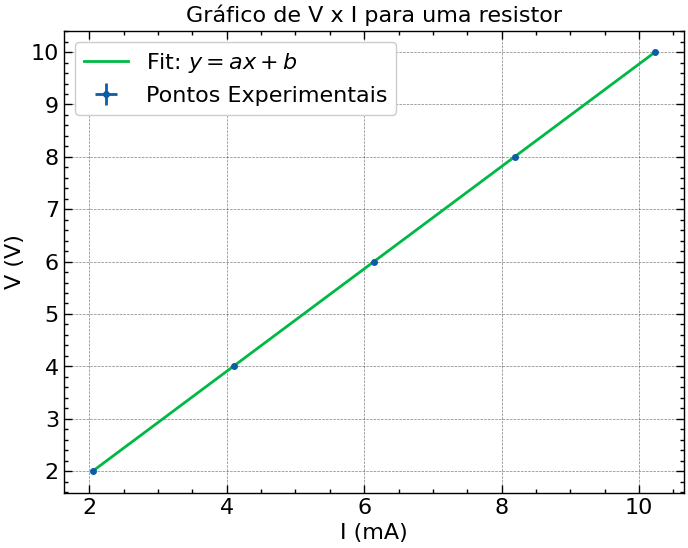

In [240]:
I = np.array([2.05, 4.10, 6.14, 8.19, 10.23])
V = np.array([2.00, 4.00, 6.00, 8.00, 10.00])

x_data = I 
y_data = V

err = 0.01

def func(x_data,a, b):
    return a*x_data + b

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

func = lambda x: a*x + b

plt.errorbar(x_data,y_data, xerr=err, yerr= err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(x_data, func(x_data) , label= r'Fit: $y = ax + b$') #$r^2$ = %.5f' % (r2)

plt.xlabel("I (mA)")
plt.ylabel("V (V)")

plt.legend()
plt.title("Gráfico de V x I para uma resistor")

#### LAMPADA

Text(0.5, 1.0, 'Gráfico de V x I para uma lâmpada')

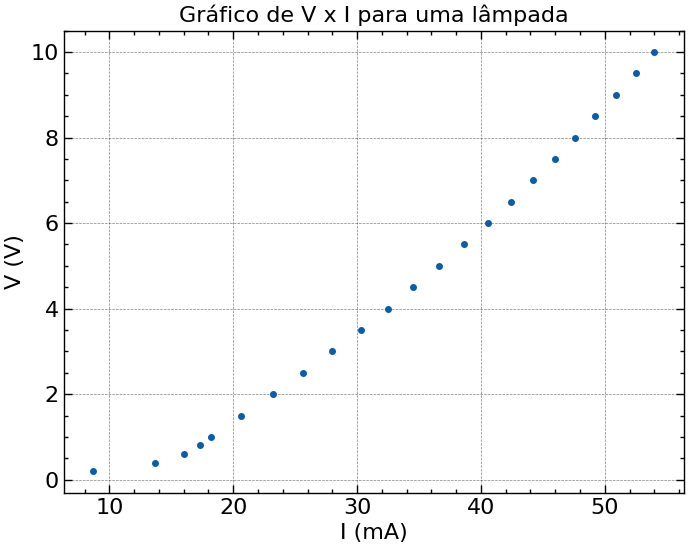

In [241]:
I = np.array([8.7, 13.7, 16.0, 17.3, 18.2, 20.6, 23.2, 25.6, 28.0, 30.3, 32.5, 34.5, 36.6, 38.6, 40.6, 42.4, 44.2, 46.0, 47.6,49.2, 50.9, 52.5, 54.0])
V = np.array([0.2,0.4,0.6,0.8,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0])

x_data = I 
y_data = V

plt.errorbar(x_data,y_data, xerr=0.1, yerr= 0.01, marker = 'o',ms = 4, ls = '')

plt.xlabel("I (mA)")
plt.ylabel("V (V)")

plt.title("Gráfico de V x I para uma lâmpada")


Text(0.5, 1.0, 'Gráfico de R x I para uma lâmpada')

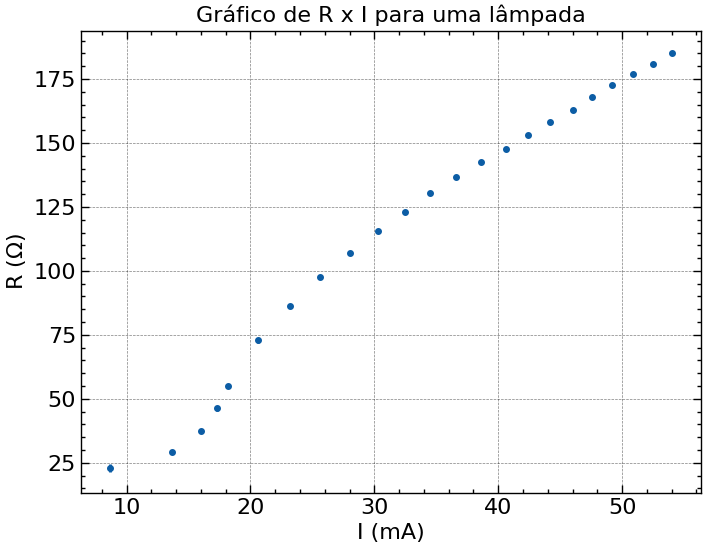

In [242]:
R = V/I
x_data = I
y_data = R

x_err = 0.1
y_err = V/(I**2) * x_err + 0.01/I

plt.errorbar(x_data,y_data *1000, xerr=x_err, yerr= y_err *1000, marker = 'o',ms = 4, ls = '')

plt.xlabel("I (mA)")
plt.ylabel(r"R ($\Omega$)")

plt.title("Gráfico de R x I para uma lâmpada")

### DIODO

In [243]:
I = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.3,2.8,4.9,6.3,8.2,10.5,12.5,14.6,16.4,18.0,20.5,21.9,23.9,26.4,27.9,29.9,32.5,34.1,36.6])
V = np.array([-1.82,-3.82,-5.96,-8.00,-10.00,-12.08,0.002,0.292,0.502,0.588,0.627,0.654,0.666,0.680,0.691,0.700,0.706,0.712,0.717,0.723,0.726,0.730,0.735,0.738,0.741,0.745,0.747,0.750])

Text(0.5, 1.0, 'Gráfico de I x V para um diodo')

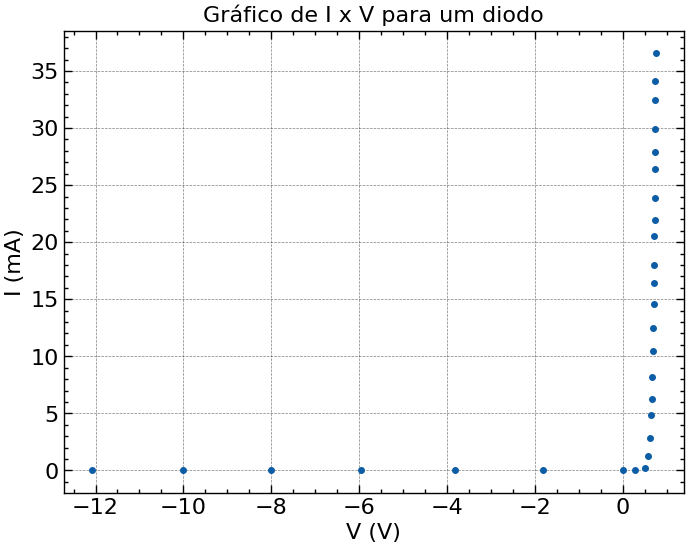

In [244]:
x_data = V
y_data = I


plt.errorbar(x_data,y_data, xerr=0.001, yerr= 0.1, marker = 'o',ms = 4, ls = '')

plt.xlabel("V (V)")
plt.ylabel("I (mA)")
plt.title("Gráfico de I x V para um diodo")

In [245]:
y_data = y_data*1e-3 #converter mA para A

def func(x_data, I_0, K): #K = e/kb T
    return I_0*np.exp(K*x_data)

popt, pcov = curve_fit(func, x_data, y_data)
I_0, K = popt
I_0_err, K_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))
print('I_0 = ', I_0)
print('K = ', K)
print(r'r^2 =', r2)
print('I_0_err = ', I_0_err)
print('K_err = ', K_err)


I_0 =  5.062143939446284e-09
K =  21.046205486511113
r^2 = 0.9999092164303467
I_0_err =  3.048260243161502e-10
K_err =  0.08188099879216726


Text(0.5, 1.0, 'Gráfico de I x V para um diodo')

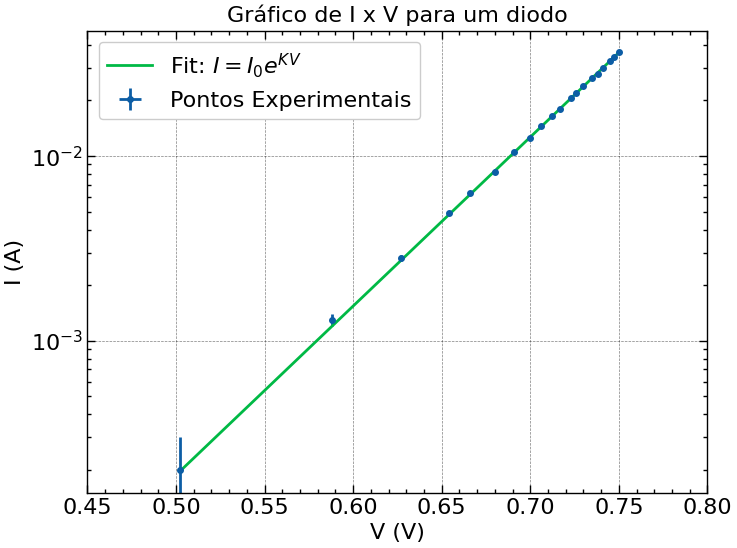

In [ ]:
plt.errorbar(x_data,y_data, xerr=0.001, yerr= 0.1*1e-3, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(x_data[8:], func(x_data[8:],I_0,K) , label= r'Fit: $I = I_0 e^{KV}$') #$r^2$ = %.5f' % (r2)

plt.xlabel("V (V)")
plt.ylabel("I (A)")

plt.yscale("log")
plt.xlim(0.45,0.8) #recorte positivo e não nulo

plt.legend()

plt.title("Gráfico de I x V para um diodo") 